In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv")
#df.to_csv("DT2_titanic.csv", index=False)
df = pd.read_csv("DT2_titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


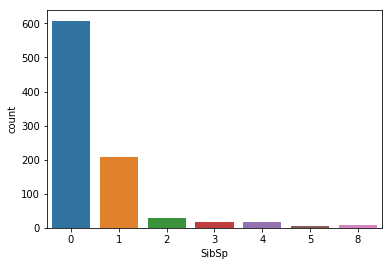

In [54]:
sns.countplot(df["SibSp"])

In [55]:
df.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [56]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [58]:
df["Age"].fillna(int(df.Age.mean()), inplace=True)
df.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,29.0,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [59]:
inputs = df.drop("Survived", axis=1)
target = df["Survived"]

In [60]:
inputs.Sex = inputs.Sex.map({'male':1,'female':2})

In [62]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [89]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [90]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.20, random_state=12)

In [91]:
print({"X_train":len(X_train), "X_test":len(X_test)})

{'X_train': 712, 'X_test': 179}


In [92]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
model.score(X_test,y_test)

0.776536312849162